# ML Assignment 5  

Joseph Bentivegna  

Implement expectation maximization on a Gaussian mixture model in 1 and 2 dimensions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as stats
from random import *
import sklearn

In [2]:
#setup means of distributions
mu1 = 2
mu2 = 5
mu3 = 8

#setup covs of distributions
cov1 = uniform(.25,1)
cov2 = uniform(.25,1)
cov3 = uniform(.25,1)

#setup distributions for histogram
gaus1 = np.random.normal(mu1, cov1, 100)
gaus2 = np.random.normal(mu2, cov2, 100)
gaus3 = np.random.normal(mu3, cov3, 100)
gausPlot = np.concatenate((np.atleast_2d(gaus1), np.atleast_2d(gaus2), np.atleast_2d(gaus3)))
gaus = np.sort(np.concatenate((gaus1, gaus2, gaus3)))

In [3]:
def plotGraph(gaus, mu, sd, ax):
    #setup spaces
    bins = np.linspace(0, 10, 100)
    x = np.linspace(0, 10, 100)
    
    #plot hists
    ax.hist(gaus[0,:], bins, normed=True, color='black')
    ax.hist(gaus[1,:], bins, normed=True, color='black')
    ax.hist(gaus[2,:], bins, normed=True, color='black')
    
    #plot PDFs
    ax.plot(x, mlab.normpdf(x, mu[0], sd[0]), lw=2)
    ax.plot(x, mlab.normpdf(x, mu[1], sd[1]), lw=2)
    ax.plot(x, mlab.normpdf(x, mu[2], sd[2]), lw=2)

In [4]:
def EM(mu, sd, pi, d):

    like1 = pi[0]*(stats.norm(mu[0], sd[0]).pdf(d))
    like2 = pi[1]*(stats.norm(mu[1], sd[1]).pdf(d))
    like3 = pi[2]*(stats.norm(mu[2], sd[2]).pdf(d))
        
    total = like1 + like2 + like3
    
    weight1 = like1/total
    weight2 = like2/total
    weight3 = like3/total
    
    mean1 = np.sum(d*weight1)/np.sum(weight1)
    mean2 = np.sum(d*weight2)/np.sum(weight2)
    mean3 = np.sum(d*weight3)/np.sum(weight3)
    
    sd1 = np.sum(weight1*(d-mean1)*(d-mean1).T)/np.sum(weight1)
    sd2 = np.sum(weight2*(d-mean2)*(d-mean2).T)/np.sum(weight2)
    sd3 = np.sum(weight3*(d-mean3)*(d-mean3).T)/np.sum(weight3)
    
    pi1 = np.sum(weight1)/len(d)
    pi2 = np.sum(weight2)/len(d)
    pi3 = np.sum(weight3)/len(d)
    
    muNew = [mean1, mean2, mean3]
    sdNew = [sd1, sd2, sd3]
    piNew = [pi1, pi2, pi3]
    
    print (muNew, sdNew)
    
    return muNew, sdNew, piNew

[2.0597148217997288, 4.9923474663308713, 8.0276972861468909] [0.25416111518976414, 0.27539468069456169, 0.38503940843792256]
[1.9768888906593396, 4.9617058879887193, 8.072208587508209] [0.089616626836471314, 0.29431693709746337, 0.28019747659859301]
[1.9606726632504712, 4.930654350564124, 8.0881076964645722] [0.078300942155721032, 0.39522871705834073, 0.25444230115078925]


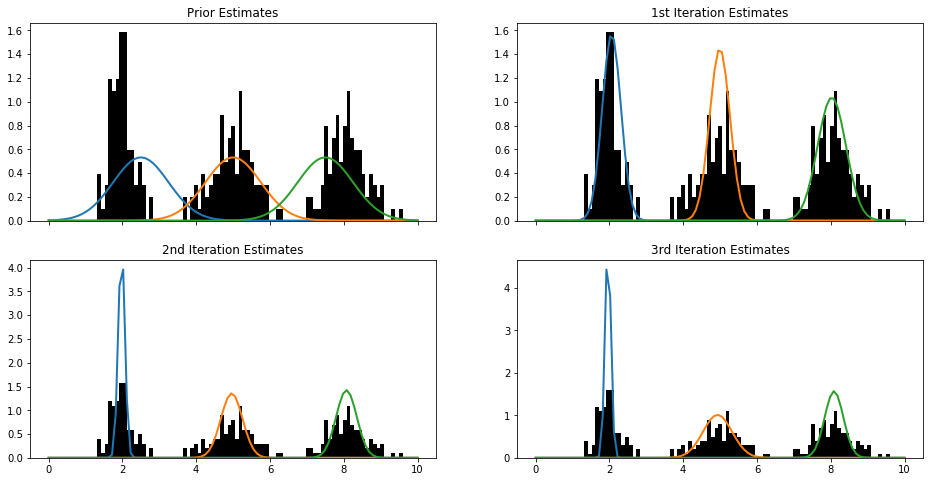

In [5]:
#priors
mup = [2.5, 5, 7.5]
sdp = [.75, .75, .75]
pip = [.33, .33, .33]

#first iteration
mu1, sd1, pi1 = EM(mup, sdp, pip, gaus)

#second iteration
mu2, sd2, pi2 = EM(mu1, sd1, pi1, gaus)

#third iteration
mu3, sd3, pi3 = EM(mu2, sd2, pi2, gaus)

# mu4, sd4, pi4 = EM(mu3, sd3, pi3, gaus)
# mu5, sd5, pi5 = EM(mu4, sd4, pi4, gaus)
# mu6, sd6, pi6 = EM(mu5, sd5, pi5, gaus)
# mu7, sd7, pi7 = EM(mu6, sd6, pi6, gaus)
# mu8, sd8, pi8 = EM(mu7, sd7, pi7, gaus)

f, ax = plt.subplots(2, 2, sharex=True, figsize=[16,8])
plotGraph(gausPlot, mup, sdp, ax[0,0])
ax[0,0].set_title('Prior Estimates')
plotGraph(gausPlot, mu1, sd1, ax[0,1])
ax[0,1].set_title('1st Iteration Estimates')
plotGraph(gausPlot, mu2, sd2, ax[1,0])
ax[1,0].set_title('2nd Iteration Estimates')
plotGraph(gausPlot, mu3, sd3, ax[1,1])
ax[1,1].set_title('3rd Iteration Estimates')
plt.show()